In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)



In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [44]:

# Target Search Term
target_terms = ("@BBC","@CBSNews","@CNN","@FoxNews", "@nytimes")

# "Real Person" Filters
min_tweets = 50
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiment_array = []

# Variable for holding the oldest tweet
oldest_tweet = ""

# Loop through all target users
for target in target_terms:

    
    counter = 0

    # Loop through 10 times (total of 1000 tweets)
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                tweet["user"]["lang"] == lang):

                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                tweet_text = tweet["text"]
                tweet_count = counter

                sentiment = {"User": target,
                             "Date": tweet["created_at"],
                             "Compound": compound,
                             "Positive": pos,
                             "Neutral": neu,
                             "Negative": neg,
                             "Tweet Count": tweet_count,
                             "Tweet Text": tweet_text} 
                counter = counter + 1
    
                sentiment_array.append(sentiment)
    
                print("--------------------")
                print(sentiment)
                print("--------------------")

--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:43 +0000 2018', 'Compound': 0.2479, 'Positive': 0.154, 'Neutral': 0.731, 'Negative': 0.115, 'Tweet Count': 0, 'Tweet Text': 'RT @PerfectlyMxtual: Was watching @ArianaGrande on @bbc and never been so proud before man, what a performance omg , jealous of your voice…'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:05 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 1, 'Tweet Text': '@SonOfLoz @BBC @LozTrue https://t.co/DBWRDfqHcj'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:42 +0000 2018', 'Compound': 0.5859, 'Positive': 0.297, 'Neutral': 0.703, 'Negative': 0.0, 'Tweet Count': 2, 'Tweet Text': '@SonOfLoz @BBC @LozTrue Oh wow i gotta think before i type huh'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:00 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral':

--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:43 +0000 2018', 'Compound': 0.2479, 'Positive': 0.154, 'Neutral': 0.731, 'Negative': 0.115, 'Tweet Count': 29, 'Tweet Text': 'RT @PerfectlyMxtual: Was watching @ArianaGrande on @bbc and never been so proud before man, what a performance omg , jealous of your voice…'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:05 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 30, 'Tweet Text': '@SonOfLoz @BBC @LozTrue https://t.co/DBWRDfqHcj'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:42 +0000 2018', 'Compound': 0.5859, 'Positive': 0.297, 'Neutral': 0.703, 'Negative': 0.0, 'Tweet Count': 31, 'Tweet Text': '@SonOfLoz @BBC @LozTrue Oh wow i gotta think before i type huh'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:00 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutra

--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:43 +0000 2018', 'Compound': 0.2479, 'Positive': 0.154, 'Neutral': 0.731, 'Negative': 0.115, 'Tweet Count': 58, 'Tweet Text': 'RT @PerfectlyMxtual: Was watching @ArianaGrande on @bbc and never been so proud before man, what a performance omg , jealous of your voice…'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:05 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 59, 'Tweet Text': '@SonOfLoz @BBC @LozTrue https://t.co/DBWRDfqHcj'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:42 +0000 2018', 'Compound': 0.5859, 'Positive': 0.297, 'Neutral': 0.703, 'Negative': 0.0, 'Tweet Count': 60, 'Tweet Text': '@SonOfLoz @BBC @LozTrue Oh wow i gotta think before i type huh'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:00 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutra

--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:43 +0000 2018', 'Compound': 0.2479, 'Positive': 0.154, 'Neutral': 0.731, 'Negative': 0.115, 'Tweet Count': 87, 'Tweet Text': 'RT @PerfectlyMxtual: Was watching @ArianaGrande on @bbc and never been so proud before man, what a performance omg , jealous of your voice…'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:05 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 88, 'Tweet Text': '@SonOfLoz @BBC @LozTrue https://t.co/DBWRDfqHcj'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:42 +0000 2018', 'Compound': 0.5859, 'Positive': 0.297, 'Neutral': 0.703, 'Negative': 0.0, 'Tweet Count': 89, 'Tweet Text': '@SonOfLoz @BBC @LozTrue Oh wow i gotta think before i type huh'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:00 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutra

--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:43 +0000 2018', 'Compound': 0.2479, 'Positive': 0.154, 'Neutral': 0.731, 'Negative': 0.115, 'Tweet Count': 116, 'Tweet Text': 'RT @PerfectlyMxtual: Was watching @ArianaGrande on @bbc and never been so proud before man, what a performance omg , jealous of your voice…'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:37:05 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 117, 'Tweet Text': '@SonOfLoz @BBC @LozTrue https://t.co/DBWRDfqHcj'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:42 +0000 2018', 'Compound': 0.5859, 'Positive': 0.297, 'Neutral': 0.703, 'Negative': 0.0, 'Tweet Count': 118, 'Tweet Text': '@SonOfLoz @BBC @LozTrue Oh wow i gotta think before i type huh'}
--------------------
--------------------
{'User': '@BBC', 'Date': 'Fri Nov 02 01:36:00 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neu

--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:38:03 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 0, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\nhttps://t.co/dCkruFhERd https…'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:59 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 1, 'Tweet Text': 'RT @CBSNews: Indicted Rep. Duncan Hunter maintains lead over Democratic opponent https://t.co/BnVMbuovdW https://t.co/dNtSggMAho'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:54 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 2, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\nht

--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:38:03 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 38, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\nhttps://t.co/dCkruFhERd https…'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:59 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 39, 'Tweet Text': 'RT @CBSNews: Indicted Rep. Duncan Hunter maintains lead over Democratic opponent https://t.co/BnVMbuovdW https://t.co/dNtSggMAho'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:54 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 40, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\

--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:38:03 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 76, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\nhttps://t.co/dCkruFhERd https…'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:59 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 77, 'Tweet Text': 'RT @CBSNews: Indicted Rep. Duncan Hunter maintains lead over Democratic opponent https://t.co/BnVMbuovdW https://t.co/dNtSggMAho'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:54 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 78, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\

--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:38:03 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 114, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\nhttps://t.co/dCkruFhERd https…'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:59 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 115, 'Tweet Text': 'RT @CBSNews: Indicted Rep. Duncan Hunter maintains lead over Democratic opponent https://t.co/BnVMbuovdW https://t.co/dNtSggMAho'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:54 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 116, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 

--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:38:03 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 152, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 \n\nhttps://t.co/dCkruFhERd https…'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:59 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 153, 'Tweet Text': 'RT @CBSNews: Indicted Rep. Duncan Hunter maintains lead over Democratic opponent https://t.co/BnVMbuovdW https://t.co/dNtSggMAho'}
--------------------
--------------------
{'User': '@CBSNews', 'Date': 'Fri Nov 02 01:37:54 +0000 2018', 'Compound': -0.4824, 'Positive': 0.0, 'Neutral': 0.844, 'Negative': 0.156, 'Tweet Count': 154, 'Tweet Text': 'RT @CBSNews: WARNING: This video of Congressman John Lewis dancing may make you @Pharrell -level "Happy." 🎵 

--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018', 'Compound': -0.296, 'Positive': 0.0, 'Neutral': 0.916, 'Negative': 0.084, 'Tweet Count': 0, 'Tweet Text': 'RT @justinfitz34: @CNN how does this @donlemon still have job? If the roles were reversed we all know the outcome. No wonder this station c…'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018', 'Compound': 0.4019, 'Positive': 0.144, 'Neutral': 0.856, 'Negative': 0.0, 'Tweet Count': 1, 'Tweet Text': '@unitzer07 @Melodee4 @CampJessop @realDonaldTrump @FoxNews @CNN @MSNBC yes they are... i have seen it on tv... WAKE UP.'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 2, 'Tweet Text': '@AmyKremer @ChrisCuomo @CNN @CuomoPrimeTime I just watched u on @CuomoPrimeTime. Why do u continue to go on that sh… https://t.co/oJ3oqfDct

--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:16 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 44, 'Tweet Text': 'RT @IngrahamAngle: Where is @CNN? https://t.co/Okm6qYjhdG'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018', 'Compound': 0.8519, 'Positive': 0.567, 'Neutral': 0.283, 'Negative': 0.15, 'Tweet Count': 45, 'Tweet Text': '@oliverdarcy @marthamaccallum Have you watched @CNN? Seriously,,lol lol lol lol lol lol pathetic'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018', 'Compound': -0.296, 'Positive': 0.0, 'Neutral': 0.916, 'Negative': 0.084, 'Tweet Count': 46, 'Tweet Text': 'RT @justinfitz34: @CNN how does this @donlemon still have job? If the roles were reversed we all know the outcome. No wonder this station c…'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018

--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:17 +0000 2018', 'Compound': 0.3875, 'Positive': 0.134, 'Neutral': 0.866, 'Negative': 0.0, 'Tweet Count': 89, 'Tweet Text': 'RT @CNN: We have nothing to fear from the migrant march | By Alice Driver via @CNNOpinion https://t.co/oBfG3CK11P https://t.co/8IOnHJ5VcJ'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:16 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 90, 'Tweet Text': 'RT @IngrahamAngle: Where is @CNN? https://t.co/Okm6qYjhdG'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018', 'Compound': 0.8519, 'Positive': 0.567, 'Neutral': 0.283, 'Negative': 0.15, 'Tweet Count': 91, 'Tweet Text': '@oliverdarcy @marthamaccallum Have you watched @CNN? Seriously,,lol lol lol lol lol lol pathetic'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:15 +0000 2018', 

--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:17 +0000 2018', 'Compound': -0.8205, 'Positive': 0.118, 'Neutral': 0.479, 'Negative': 0.403, 'Tweet Count': 135, 'Tweet Text': '@CNN The same Hollywood where rape, abuse are a necessity to get a role?? interesting indeed.'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:17 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 136, 'Tweet Text': 'RT @CNN: While campaigning for Stacey Abrams, Oprah calls out nonvoters, saying: "For anybody here who has an ancestor who didn\'t have the…'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:17 +0000 2018', 'Compound': 0.3875, 'Positive': 0.134, 'Neutral': 0.866, 'Negative': 0.0, 'Tweet Count': 137, 'Tweet Text': 'RT @CNN: We have nothing to fear from the migrant march | By Alice Driver via @CNNOpinion https://t.co/oBfG3CK11P https://t.co/8IOnHJ5VcJ'}
----------------

--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:19 +0000 2018', 'Compound': -0.4588, 'Positive': 0.0, 'Neutral': 0.87, 'Negative': 0.13, 'Tweet Count': 182, 'Tweet Text': '@EricTrump @CNN Did you know that our children are forced to watch this in their social studies classes.  Just thin… https://t.co/fOJyjqhk3Q'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:18 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 183, 'Tweet Text': '@AmyKremer @ChrisCuomo @CNN @CuomoPrimeTime Who is this Amy Kremer broad? What’s her background, her education, pol… https://t.co/PvZnp7Wwh2'}
--------------------
--------------------
{'User': '@CNN', 'Date': 'Fri Nov 02 01:38:17 +0000 2018', 'Compound': -0.8205, 'Positive': 0.118, 'Neutral': 0.479, 'Negative': 0.403, 'Tweet Count': 184, 'Tweet Text': '@CNN The same Hollywood where rape, abuse are a necessity to get a role?? interesting indeed.'}
--------------

--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:18 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 0, 'Tweet Text': 'RT @JcNcXDM: @FoxNews MAGA🇺🇸🇺🇸🇺🇸👌👌👌👍👍👍 https://t.co/3NGKoyJWB8'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:17 +0000 2018', 'Compound': 0.3818, 'Positive': 0.269, 'Neutral': 0.513, 'Negative': 0.218, 'Tweet Count': 1, 'Tweet Text': 'RT @ProudResister: The greatest threat to America is not “migrants throwing stones.” The greatest threat to America is right-wing extremist…'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:17 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 2, 'Tweet Text': '@KDOthecoolkid @profjimr @FoxNews @MrMikeBlake https://t.co/gmMhg7TA4f'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:16 +0000 2018', 'Compound':

--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:21 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.897, 'Negative': 0.103, 'Tweet Count': 39, 'Tweet Text': '@FoxNews He also said he’d instruct the military to open fire on civilians.\n\nIf those waiting at the border won’t l… https://t.co/1PDrHTOT36'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.2023, 'Positive': 0.102, 'Neutral': 0.766, 'Negative': 0.131, 'Tweet Count': 40, 'Tweet Text': 'RT @FoxNews: .@POTUS: "These illegal caravans will not be allowed into the United States and they should turn back now because they\'re wast…'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:18 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 41, 'Tweet Text': 'RT @JcNcXDM: @FoxNews MAGA🇺🇸🇺🇸🇺🇸👌👌👌👍👍👍 https://t.co/3NGKoyJWB8'}
--------------------
------------

--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:21 +0000 2018', 'Compound': 0.4871, 'Positive': 0.345, 'Neutral': 0.655, 'Negative': 0.0, 'Tweet Count': 78, 'Tweet Text': '@ivansolis360 @FoxNews @LisaMarieBoothe Is it NOT true??'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:21 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.897, 'Negative': 0.103, 'Tweet Count': 79, 'Tweet Text': '@FoxNews He also said he’d instruct the military to open fire on civilians.\n\nIf those waiting at the border won’t l… https://t.co/1PDrHTOT36'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.2023, 'Positive': 0.102, 'Neutral': 0.766, 'Negative': 0.131, 'Tweet Count': 80, 'Tweet Text': 'RT @FoxNews: .@POTUS: "These illegal caravans will not be allowed into the United States and they should turn back now because they\'re wast…'}
--------------------
-----------

--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:21 +0000 2018', 'Compound': 0.4871, 'Positive': 0.345, 'Neutral': 0.655, 'Negative': 0.0, 'Tweet Count': 115, 'Tweet Text': '@ivansolis360 @FoxNews @LisaMarieBoothe Is it NOT true??'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:21 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.897, 'Negative': 0.103, 'Tweet Count': 116, 'Tweet Text': '@FoxNews He also said he’d instruct the military to open fire on civilians.\n\nIf those waiting at the border won’t l… https://t.co/1PDrHTOT36'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.2023, 'Positive': 0.102, 'Neutral': 0.766, 'Negative': 0.131, 'Tweet Count': 117, 'Tweet Text': 'RT @FoxNews: .@POTUS: "These illegal caravans will not be allowed into the United States and they should turn back now because they\'re wast…'}
--------------------
--------

--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:23 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweet Count': 152, 'Tweet Text': '@crbrown08054703 @Jonny76875738 @JacobAWohl @FoxNews They may not touch this...or at least slow-play this to see if… https://t.co/LuMn129hyi'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:21 +0000 2018', 'Compound': 0.4871, 'Positive': 0.345, 'Neutral': 0.655, 'Negative': 0.0, 'Tweet Count': 153, 'Tweet Text': '@ivansolis360 @FoxNews @LisaMarieBoothe Is it NOT true??'}
--------------------
--------------------
{'User': '@FoxNews', 'Date': 'Fri Nov 02 01:38:21 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.897, 'Negative': 0.103, 'Tweet Count': 154, 'Tweet Text': '@FoxNews He also said he’d instruct the military to open fire on civilians.\n\nIf those waiting at the border won’t l… https://t.co/1PDrHTOT36'}
--------------------
-------------------

--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:22 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.893, 'Negative': 0.107, 'Tweet Count': 0, 'Tweet Text': '@nytimes 15000 troops at the boarder the President says if they throw a rock will shoot,  what does the southern bo… https://t.co/MV7CbCy2v1'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.1027, 'Positive': 0.0, 'Neutral': 0.903, 'Negative': 0.097, 'Tweet Count': 1, 'Tweet Text': 'RT @mitchellreports: What will it take for the world to pay attention? @nytimes https://t.co/wRibQ7I1hz'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:19 +0000 2018', 'Compound': 0.8779, 'Positive': 0.461, 'Neutral': 0.539, 'Negative': 0.0, 'Tweet Count': 2, 'Tweet Text': '@LbLeebaron @Wisconsin_Idea @TricoteuseToo @nytimes Lol. yeah funny how you couldn’t care less about the living bei… https://t.co/ui5t8v

--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:22 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.893, 'Negative': 0.107, 'Tweet Count': 34, 'Tweet Text': '@nytimes 15000 troops at the boarder the President says if they throw a rock will shoot,  what does the southern bo… https://t.co/MV7CbCy2v1'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.1027, 'Positive': 0.0, 'Neutral': 0.903, 'Negative': 0.097, 'Tweet Count': 35, 'Tweet Text': 'RT @mitchellreports: What will it take for the world to pay attention? @nytimes https://t.co/wRibQ7I1hz'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:19 +0000 2018', 'Compound': 0.8779, 'Positive': 0.461, 'Neutral': 0.539, 'Negative': 0.0, 'Tweet Count': 36, 'Tweet Text': '@LbLeebaron @Wisconsin_Idea @TricoteuseToo @nytimes Lol. yeah funny how you couldn’t care less about the living bei… https://t.co/ui5

--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:26 +0000 2018', 'Compound': 0.34, 'Positive': 0.094, 'Neutral': 0.906, 'Negative': 0.0, 'Tweet Count': 68, 'Tweet Text': '@nytimes You are using Clinton’s play book how much time and money do you have given back to the people who need it… https://t.co/RoSh7zCJrk'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:22 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.893, 'Negative': 0.107, 'Tweet Count': 69, 'Tweet Text': '@nytimes 15000 troops at the boarder the President says if they throw a rock will shoot,  what does the southern bo… https://t.co/MV7CbCy2v1'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.1027, 'Positive': 0.0, 'Neutral': 0.903, 'Negative': 0.097, 'Tweet Count': 70, 'Tweet Text': 'RT @mitchellreports: What will it take for the world to pay attention? @nytimes https://t.co/wRibQ

--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:26 +0000 2018', 'Compound': 0.34, 'Positive': 0.094, 'Neutral': 0.906, 'Negative': 0.0, 'Tweet Count': 102, 'Tweet Text': '@nytimes You are using Clinton’s play book how much time and money do you have given back to the people who need it… https://t.co/RoSh7zCJrk'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:22 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.893, 'Negative': 0.107, 'Tweet Count': 103, 'Tweet Text': '@nytimes 15000 troops at the boarder the President says if they throw a rock will shoot,  what does the southern bo… https://t.co/MV7CbCy2v1'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.1027, 'Positive': 0.0, 'Neutral': 0.903, 'Negative': 0.097, 'Tweet Count': 104, 'Tweet Text': 'RT @mitchellreports: What will it take for the world to pay attention? @nytimes https://t.co/wR

--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:26 +0000 2018', 'Compound': 0.34, 'Positive': 0.094, 'Neutral': 0.906, 'Negative': 0.0, 'Tweet Count': 136, 'Tweet Text': '@nytimes You are using Clinton’s play book how much time and money do you have given back to the people who need it… https://t.co/RoSh7zCJrk'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:22 +0000 2018', 'Compound': -0.34, 'Positive': 0.0, 'Neutral': 0.893, 'Negative': 0.107, 'Tweet Count': 137, 'Tweet Text': '@nytimes 15000 troops at the boarder the President says if they throw a rock will shoot,  what does the southern bo… https://t.co/MV7CbCy2v1'}
--------------------
--------------------
{'User': '@nytimes', 'Date': 'Fri Nov 02 01:38:20 +0000 2018', 'Compound': -0.1027, 'Positive': 0.0, 'Neutral': 0.903, 'Negative': 0.097, 'Tweet Count': 138, 'Tweet Text': 'RT @mitchellreports: What will it take for the world to pay attention? @nytimes https://t.co/wR

In [11]:
sentiment_df = pd.DataFrame.from_dict(sentiment_array)
sentiment_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Count,Tweet Text,User
0,0.6072,Fri Nov 02 00:43:12 +0000 2018,0.0,0.752,0.248,0,@bustermerlin1 @redgierob @afneil @HackneyAbbo...,@BBC
1,0.0000,Fri Nov 02 00:43:09 +0000 2018,0.0,1.000,0.000,1,RT @dankraker: #Duluth is at the center of the...,@BBC
2,0.0000,Fri Nov 02 00:43:01 +0000 2018,0.0,1.000,0.000,2,@davidrghendy @carolecadwalla @bbclaurak @BBCN...,@BBC
3,0.0258,Fri Nov 02 00:41:32 +0000 2018,0.0,0.956,0.044,3,RT @rzeta0: why does the @bbc #bbcqt give so m...,@BBC
4,0.0000,Fri Nov 02 00:40:21 +0000 2018,0.0,1.000,0.000,4,@Shambles151 @carolecadwalla @BBC says who?,@BBC


In [6]:
#Export CSV
sentiment_df.to_csv(".csv", index=False)

In [7]:
BBC = sentiment_df[(sentiment_df.User == "@BBC")]
CBSNews = sentiment_df[(sentiment_df.User == "@CBSNews")]
CNN = sentiment_df[(sentiment_df.User == "@CNN")]
FoxNews = sentiment_df[(sentiment_df.User == "@FoxNews")]
NYTimes = sentiment_df[(sentiment_df.User == "@nytimes")]

In [12]:
CNN.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Count,Tweet Text,User
708,0.000,Fri Nov 02 00:44:51 +0000 2018,0.000,1.000,0.000,0,@CNN @CillizzaCNN Really? I thought Trump just...,@CNN
709,0.000,Fri Nov 02 00:44:49 +0000 2018,0.000,1.000,0.000,1,"RT @CNN: While campaigning for Stacey Abrams, ...",@CNN
710,-0.607,Fri Nov 02 00:44:48 +0000 2018,0.226,0.716,0.059,2,@IngrahamAngle @CNN You should not be surprise...,@CNN
711,0.000,Fri Nov 02 00:44:48 +0000 2018,0.000,1.000,0.000,3,#WalkAway #BLEXIT @ABC @CBSNews @NBCNews @MSNB...,@CNN
712,-0.340,Fri Nov 02 00:44:47 +0000 2018,0.146,0.854,0.000,4,"@CNN You are not a democrat, you are a mole pl...",@CNN


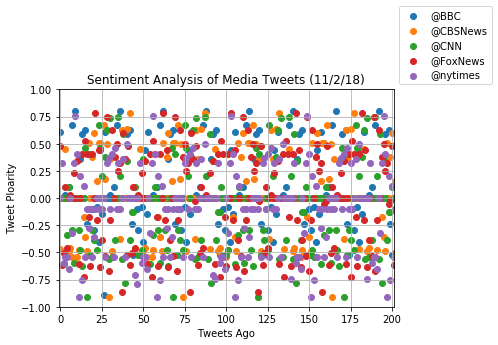

In [36]:
plt.xlim(-1,201)
plt.ylim(-1,1)
for User in target_terms:
    tweet_df = sentiment_df.loc[sentiment_df["User"] == User]
    plt.scatter(tweet_df["Tweet Count"],tweet_df["Compound"], label = User)

plt.legend(bbox_to_anchor = (1,1))

plt.grid()
plt.title("Sentiment Analysis of Media Tweets (11/2/18)")
plt.xlabel("Tweets Ago")
plt.ylabel ("Tweet Ploarity")

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [38]:
mean_sentiment = sentiment_df.groupby("User")["Compound"].mean()
mean_sentiment

User
@BBC        0.089974
@CBSNews    0.032734
@CNN       -0.098540
@FoxNews    0.005240
@nytimes   -0.097978
Name: Compound, dtype: float64

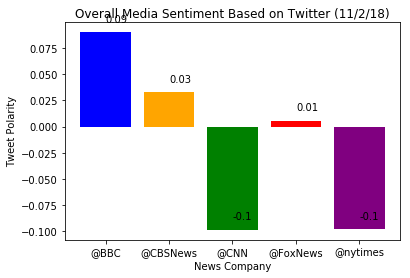

In [43]:
x_axis = np.arange(len(mean_sentiment))
xlabels = mean_sentiment.index
count = 0
for sentiment in mean_sentiment:
    plt.text(count, sentiment+.01,str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, mean_sentiment, tick_label = xlabels, color = ["blue", "orange", "green", "red", "purple"])

plt.title("Overall Media Sentiment Based on Twitter (11/2/18)")
plt.xlabel("News Company")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()

Observational Trends:

1) Overall the BBC seems to get the most praise compared to the mass amounts of negative tweets to the US based news channels.

2) Most of the tweets are either at -.5 or .5 so they are somewhat balenced.

3) I am going to guess that a lot of the tweets are at zero because they are just tweeting at other people to see the tweets.